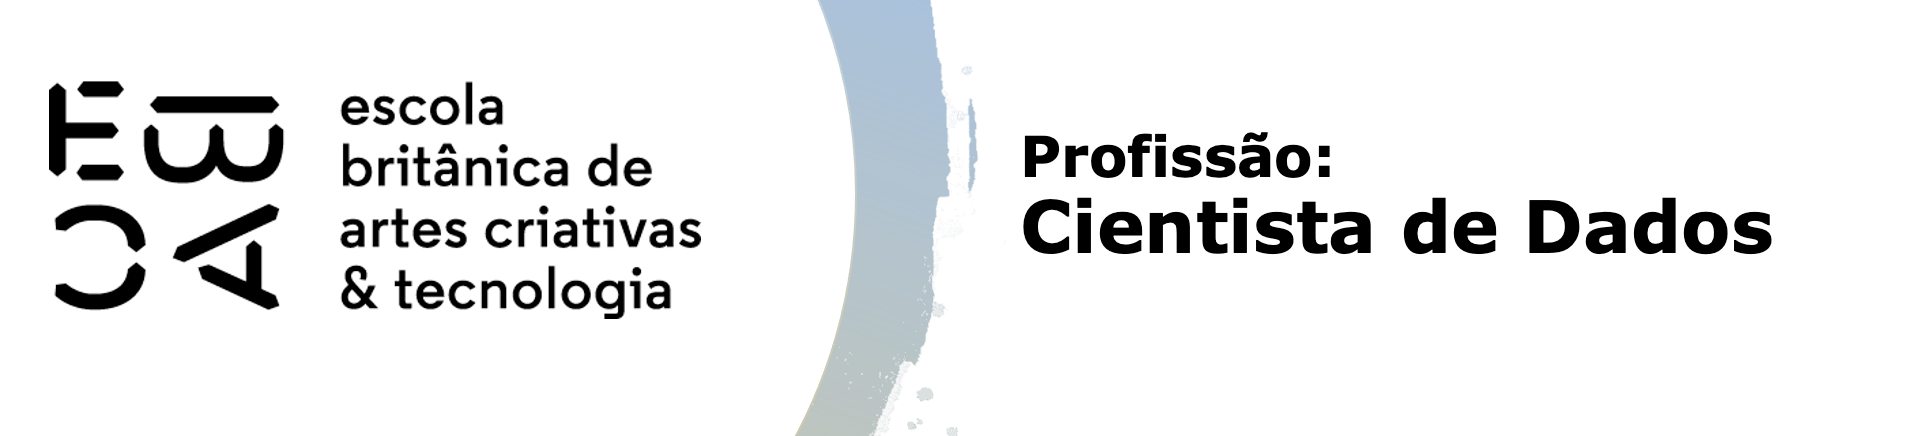

# Tarefa

<Axes: xlabel='sex', ylabel='body_mass_g'>

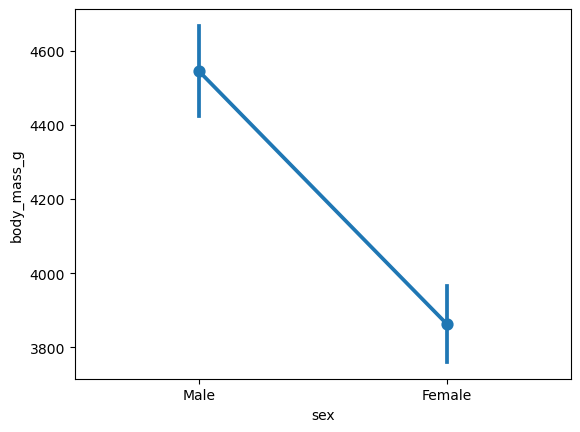

In [4]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

pg = sns.load_dataset('penguins')

pg.groupby('sex')['body_mass_g'].describe()

sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [3]:

# Separamos os dados de peso dos machos e fêmeas
male_weight = pg[pg['sex'] == 'Male']['body_mass_g'].dropna()
female_weight = pg[pg['sex'] == 'Female']['body_mass_g'].dropna()

# Realizamos o teste t
t_stat, p_value = stats.ttest_ind(male_weight, female_weight)

# Definimos o nível de significância
alpha = 0.05

# Exibimos os resultados
print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_value}')

# Verificamos a hipótese
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa no peso entre machos e fêmeas.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")


Estatística t: 8.541720337994516
Valor p: 4.897246751596224e-16
Rejeitamos a hipótese nula. Há uma diferença significativa no peso entre machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

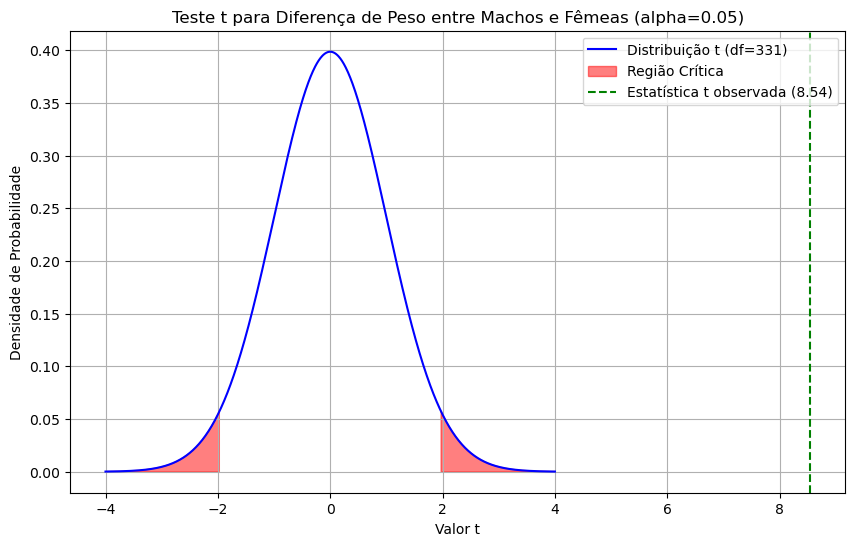

In [5]:
# Número de graus de liberdade (n1 + n2 - 2)
df = len(male_weight) + len(female_weight) - 2

# Calculando a estatística t (já feita anteriormente)
t_stat, p_value = stats.ttest_ind(male_weight, female_weight)

# Definir os valores para o gráfico (faixa de t)
x = np.linspace(-4, 4, 1000)

# Distribuição t
y = t.pdf(x, df)

# Plotando a distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Distribuição t (df={df})', color='blue')

# Região crítica (área de rejeição)
plt.fill_between(x, y, where=(x >= t.ppf(1 - alpha / 2, df)) | (x <= t.ppf(alpha / 2, df)), color='red', alpha=0.5, label='Região Crítica')

# Estatística t observada
plt.axvline(t_stat, color='green', linestyle='dashed', label=f'Estatística t observada ({t_stat:.2f})')

# Configuração do gráfico
plt.title(f'Teste t para Diferença de Peso entre Machos e Fêmeas (alpha={alpha})')
plt.xlabel('Valor t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [6]:
# Listando as espécies únicas de pinguins no dataset
species = pg['species'].unique()

# Realizando o teste t para cada espécie
results = {}

for sp in species:
    # Filtrando os dados para a espécie atual
    sp_data = pg[pg['species'] == sp]
    
    # Separando os pesos dos machos e fêmeas
    male_weight = sp_data[sp_data['sex'] == 'Male']['body_mass_g'].dropna()
    female_weight = sp_data[sp_data['sex'] == 'Female']['body_mass_g'].dropna()

    # Realizando o teste t
    t_stat, p_value = stats.ttest_ind(male_weight, female_weight)
    
    # Armazenando o p-value e a estatística t para cada espécie
    results[sp] = {
        't_stat': t_stat,
        'p_value': p_value
    }

# Exibindo os resultados para cada espécie
for sp, result in results.items():
    print(f"Espécie: {sp}")
    print(f"  Estatística t: {result['t_stat']:.3f}")
    print(f"  p-value: {result['p_value']:.3f}\n")


Espécie: Adelie
  Estatística t: 13.126
  p-value: 0.000

Espécie: Chinstrap
  Estatística t: 5.208
  p-value: 0.000

Espécie: Gentoo
  Estatística t: 14.722
  p-value: 0.000

